# Predicts x for A1 with L2 = 0.02

In [1]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import concat
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras import regularizers

In [2]:
raw_df = pd.read_csv(r'C:\Users\saran\Desktop\ML Greatness\highd-dataset-v1.0\data\01_tracks.csv')
raw_df['v_id']=list(raw_df.id)

In [3]:
width = raw_df.pop('width')
height= raw_df.pop('height')
#xAcceleration= df.pop('xAcceleration')
#yAcceleration= df.pop('yAcceleration')
#precedingXVelocity = raw_df.pop('precedingXVelocity')
precedingId = raw_df.pop('precedingId')
#frontSightDistance= raw_df.pop('frontSightDistance')
#backSightDistance= raw_df.pop('backSightDistance')
dhw= raw_df.pop('dhw')
thw= raw_df.pop('thw')
#ttc= raw_df.pop('ttc')


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(raw_df.drop(columns=['v_id']))

scaled_df=pd.DataFrame(data=scaled,columns=raw_df.drop(columns=['v_id']).columns)

In [5]:
raw_df = raw_df.set_index(['id','frame'])
raw_df.sort_index(inplace=True)


raw_df.head(5)


raw_df.head()

x      y  xVelocity  yVelocity  xAcceleration  yAcceleration  \
id frame                                                                      
1  1      362.26  21.68      40.85       0.00           0.30            0.0   
   2      363.73  21.68      40.87       0.00           0.30            0.0   
   3      365.27  21.68      40.88       0.00           0.31            0.0   
   4      366.83  21.68      40.89       0.00           0.32            0.0   
   5      368.42  21.68      40.90       0.01           0.32            0.0   

          frontSightDistance  backSightDistance  ttc  precedingXVelocity  \
id frame                                                                   
1  1                   48.05             363.77  0.0                 0.0   
   2                   46.54             365.28  0.0                 0.0   
   3                   44.87             366.95  0.0                 0.0   
   4                   43.25             368.57  0.0                 0.0   
   5                   41.64             370.18  0.0                 0.0   

          laneId  v_id  
id frame                
1  1           5     1  
   2           5     1  
   3           5     1  
   4           5     1  
   5           5     1

In [6]:
df = raw_df.copy()
df[scaled_df.columns] = np.array(scaled_df) 

In [7]:
def train_test_split(data):
    size_train=int(len(data)*0.7)
    size_val = int(len(data)*0.9)
    train_df =data.iloc[0:size_train]
    val_df = data.iloc[size_train:size_val]
    test_df = data.iloc[size_val:]
    

    return train_df, val_df, test_df 

In [8]:
v_id=list(set(df.v_id))
 
train_df=[]
val_df=[]
test_df=[]

for i in range(0,len(v_id)):
    data=df[df['v_id']==v_id[i]]
    df_train,df_val, df_test = train_test_split(data)
    train_df.append(df_train)
    test_df.append(df_test)
    val_df.append(df_val)

train_df=pd.concat(train_df)
val_df=pd.concat(test_df)
test_df=pd.concat(test_df)

In [9]:
num_features = train_df.shape[1]
train_df.head(100)

x         y  xVelocity  yVelocity  xAcceleration  \
id frame                                                            
1  1      0.878522  0.698808   0.905074   0.505650       0.627413   
   2      0.881939  0.698808   0.905276   0.505650       0.627413   
   3      0.885518  0.698808   0.905377   0.505650       0.629344   
   4      0.889145  0.698808   0.905478   0.505650       0.631274   
   5      0.892841  0.698808   0.905579   0.508475       0.631274   
...            ...       ...        ...        ...            ...   
2  73     0.198698  0.055469   0.165238   0.480226       0.548263   
   74     0.195700  0.055469   0.165238   0.480226       0.548263   
   75     0.192655  0.054951   0.165137   0.480226       0.546332   
   76     0.189633  0.054951   0.165137   0.480226       0.546332   
   77     0.186588  0.054432   0.165036   0.480226       0.546332   

          yAcceleration  frontSightDistance  backSightDistance       ttc  \
id frame                                                                   
1  1           0.454545            0.138900           0.864395  0.953004   
   2           0.454545            0.135293           0.868003  0.953004   
   3           0.454545            0.131305           0.871995  0.953004   
   4           0.454545            0.127436           0.875866  0.953004   
   5           0.454545            0.123591           0.879714  0.953004   
...                 ...                 ...                ...       ...   
2  73          0.460606            0.194545           0.808709  0.953004   
   74          0.460606            0.191656           0.811601  0.953004   
   75          0.460606            0.188264           0.814995  0.953004   
   76          0.466667            0.185374           0.817886  0.953004   
   77          0.466667            0.182103           0.821161  0.953004   

          precedingXVelocity  laneId  v_id     frame        id  
id frame                                                        
1  1                0.492989    0.75     1  0.000000  0.000000  
   2                0.492989    0.75     1  0.000044  0.000000  
   3                0.492989    0.75     1  0.000089  0.000000  
   4                0.492989    0.75     1  0.000133  0.000000  
   5                0.492989    0.75     1  0.000177  0.000000  
...                      ...     ...   ...       ...       ...  
2  73               0.492989    0.00     2  0.003195  0.000956  
   74               0.492989    0.00     2  0.003239  0.000956  
   75               0.492989    0.00     2  0.003283  0.000956  
   76               0.492989    0.00     2  0.003328  0.000956  
   77               0.492989    0.00     2  0.003372  0.000956  

[100 rows x 14 columns]

In [10]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
   
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

      
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
                f'Total window size: {self.total_window_size}',
                f'Input indices: {self.input_indices}',
                f'Label indices: {self.label_indices}',
                f'Label column name(s): {self.label_columns}'])

In [11]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [12]:
def plot(self, model=None, plot_col='x', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
             label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
             label_col_index = plot_col_index

        if label_col_index is None:
        
             continue
        
        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
    
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time (s)')

WindowGenerator.plot = plot

In [13]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=30,)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [14]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    result = getattr(self, '_example', None)
    if result is None:
   
        result = next(iter(self.train))
    
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Total window size: 60
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Label column name(s): ['x']

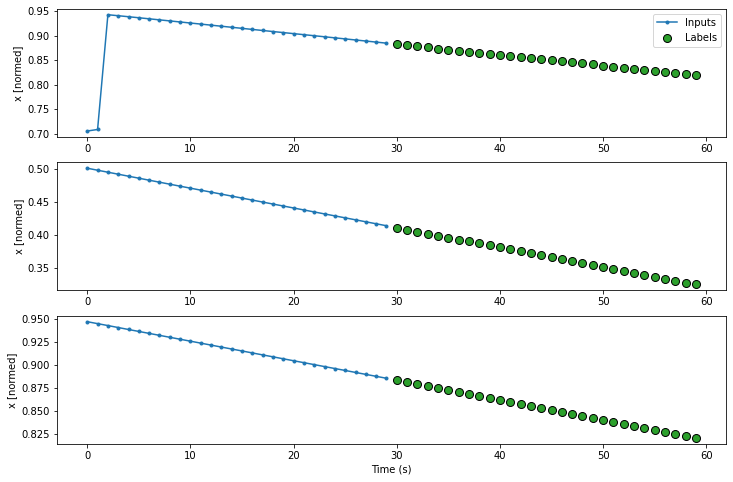

In [15]:
OUT_STEPS_1 = 30
multi_window_1 = WindowGenerator(input_width=30,
                               label_width=OUT_STEPS_1,
                               shift=OUT_STEPS_1, label_columns=['x'])

multi_window_1.plot()
multi_window_1

Total window size: 120
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
Label indices: [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119]
Label column name(s): ['x']

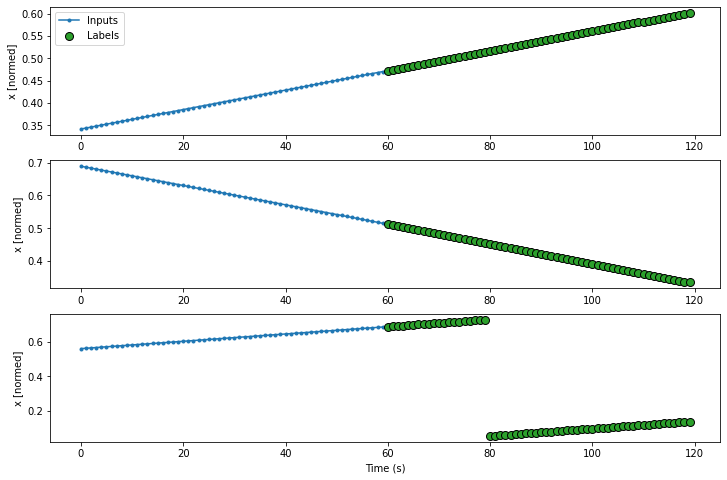

In [16]:
OUT_STEPS_2 = 60
multi_window_2 = WindowGenerator(input_width=60,
                               label_width=OUT_STEPS_2,
                               shift=OUT_STEPS_2, label_columns=['x'])

multi_window_2.plot()
multi_window_2

Total window size: 300
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]
Label indices: [150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 

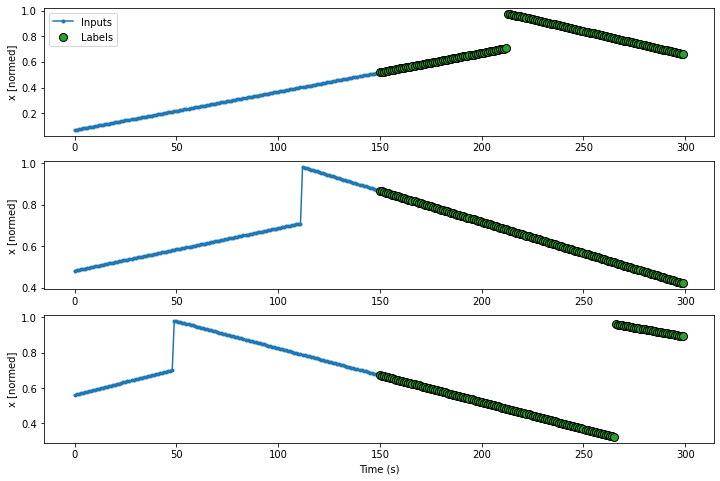

In [17]:
OUT_STEPS_5 = 150
multi_window_5 = WindowGenerator(input_width=150,
                               label_width=OUT_STEPS_5,
                               shift=OUT_STEPS_5, label_columns=['x'])

multi_window_5.plot()
multi_window_5

Total window size: 600
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

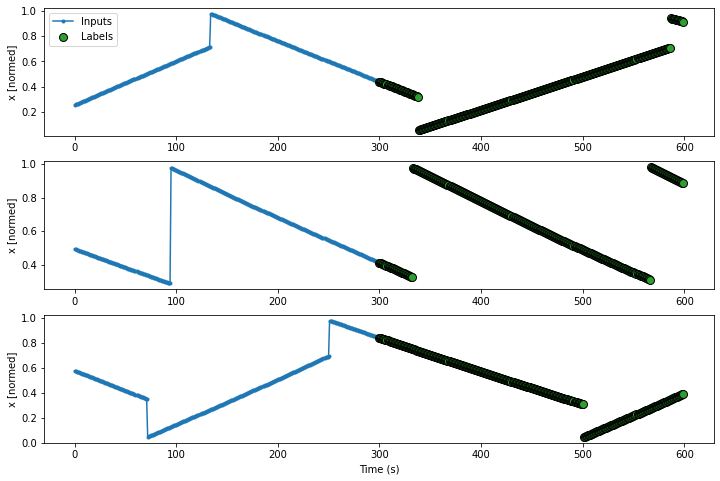

In [18]:
OUT_STEPS_10 = 300
multi_window_10 = WindowGenerator(input_width=300,
                               label_width=OUT_STEPS_10,
                               shift=OUT_STEPS_10, label_columns=['x'])

multi_window_10.plot()
multi_window_10

In [19]:
MAX_EPOCHS = 100000

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
    optimizer = tf.keras.optimizers.Adam(0.0001)
    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=optimizer,
                metrics=[tf.metrics.MeanSquaredError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
                       
    return history

In [20]:
multi_lstm_model_1 = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
   
    
    tf.keras.layers.LSTM(32, return_sequences=False, recurrent_regularizer=regularizers.l1_l2(l1=0.00, l2=0.02)),
    
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS_1*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS_1, num_features])
])

multi_val_performance = {}
multi_performance = {}
history_1 = compile_and_fit(multi_lstm_model_1, multi_window_1)

IPython.display.clear_output()

multi_val_performance['LSTM_1'] = multi_lstm_model_1.evaluate(multi_window_1.val)
multi_performance['LSTM_1'] = multi_lstm_model_1.evaluate(multi_window_1.test, verbose=0)


1177/1177 [==============================] - 3s 2ms/step - loss: 0.1306 - mean_squared_error: 0.1306


In [21]:
multi_lstm_model_2 = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    
    
    tf.keras.layers.LSTM(32, return_sequences=False, recurrent_regularizer=regularizers.l1_l2(l1=0.00, l2=0.02)),
    
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS_2*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS_2, num_features])
])


history_2 = compile_and_fit(multi_lstm_model_2, multi_window_2)

IPython.display.clear_output()

multi_val_performance['LSTM_2'] = multi_lstm_model_2.evaluate(multi_window_2.val)
multi_performance['LSTM_2'] = multi_lstm_model_2.evaluate(multi_window_2.test, verbose=0)

1175/1175 [==============================] - 4s 3ms/step - loss: 0.1683 - mean_squared_error: 0.1682


In [22]:
multi_lstm_model_5 = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]

    
    tf.keras.layers.LSTM(32, return_sequences=False, recurrent_regularizer=regularizers.l1_l2(l1=0.00, l2=0.02)),
    
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS_5*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS_5, num_features])
])


history_5 = compile_and_fit(multi_lstm_model_5, multi_window_5)

IPython.display.clear_output()

multi_val_performance['LSTM_5'] = multi_lstm_model_5.evaluate(multi_window_5.val)
multi_performance['LSTM_5'] = multi_lstm_model_5.evaluate(multi_window_5.test, verbose=0)

1169/1169 [==============================] - 5s 4ms/step - loss: 0.1843 - mean_squared_error: 0.1842


In [23]:
multi_lstm_model_10 = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    
    
    tf.keras.layers.LSTM(32, return_sequences=False, recurrent_regularizer=regularizers.l1_l2(l1=0.00, l2=0.02)),
    
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS_10*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS_10, num_features])
])


history_10 = compile_and_fit(multi_lstm_model_10, multi_window_10)

IPython.display.clear_output()

multi_val_performance['LSTM_10'] = multi_lstm_model_10.evaluate(multi_window_10.val)
multi_performance['LSTM_10'] = multi_lstm_model_10.evaluate(multi_window_10.test, verbose=0)

1159/1159 [==============================] - 7s 6ms/step - loss: 0.1920 - mean_squared_error: 0.1920
